#### Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading

In [61]:
df = pd.read_csv("data/raw/financial_health_analysis_dataset.csv")
df.head()

,Date,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost
0,2000-01-01,91910,56996,34914,36583,37428,50606,50085,14159,278,7633,42235.94
1,2000-01-02,76044,17614,58430,57621,15068,143451,53894,12173,346,11913,12960.62
2,2000-01-03,87214,49647,37567,42285,20229,67733,30019,15107,379,11490,39471.72
3,2000-01-04,53827,72940,-19113,-16957,33478,90394,53827,17132,444,3905,56926.27
4,2000-01-05,75820,15620,60200,63913,21908,110797,28184,14723,220,13197,12298.48


#### Data Cleaning
a. Handle missing values

In [62]:
df.dtypes

Date                 object
Revenue               int64
Expenses              int64
Profit                int64
Cash Flow             int64
Debt                  int64
Assets                int64
Liabilities           int64
Marketing Spend       int64
Employee Count        int64
Tax Paid              int64
Operational Cost    float64
dtype: object

In [63]:
# count missing
df.isnull().sum()

Date                0
Revenue             0
Expenses            0
Profit              0
Cash Flow           0
Debt                0
Assets              0
Liabilities         0
Marketing Spend     0
Employee Count      0
Tax Paid            0
Operational Cost    0
dtype: int64

b. Identify & address outliers

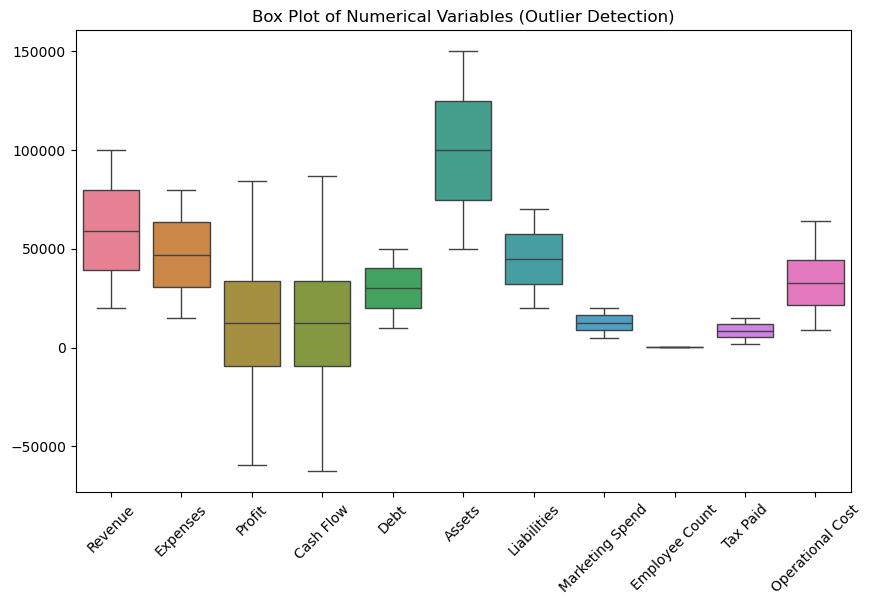

In [64]:
# Select numerical cols excluding date
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Box plot for outlier detection
plt.figure(figsize = (10, 6))
sns.boxplot(data = df[num_cols])
plt.title("Box Plot of Numerical Variables (Outlier Detection)")
plt.xticks(rotation = 45)
plt.show()

In [65]:
# Quantify Outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
    print(f"{col}: {len(outliers)} outliers")

Revenue: 0 outliers
Expenses: 0 outliers
Profit: 0 outliers
Cash Flow: 0 outliers
Debt: 0 outliers
Assets: 0 outliers
Liabilities: 0 outliers
Marketing Spend: 0 outliers
Employee Count: 0 outliers
Tax Paid: 0 outliers
Operational Cost: 0 outliers


c. Data consistency check

In [66]:
# Check if profit = Revenue - Expenses (should be all true)
print("Profit consistency check:", all(df["Profit"] == (df["Revenue"] - df["Expenses"])))

Profit consistency check: True


Exploratory Data Analysis

descriptive statistics for each variable (mean, median, mode, standard deviation)

In [67]:
df.describe()

,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,59508.545100,47249.836400,12258.70870,12248.088650,30082.962300,99968.189150,44978.947150,12483.372500,274.786350,8482.522800,33071.758312
std,23209.165749,18862.986125,29843.89368,29982.651637,11532.833832,28822.209403,14505.592213,4340.376592,130.003427,3751.305433,13524.040510
min,20002.000000,15002.000000,-59398.00000,-62580.000000,10001.000000,50002.000000,20001.000000,5000.000000,50.000000,2000.000000,9030.720000
25%,39384.000000,30729.750000,-9143.00000,-9307.000000,20124.750000,74730.750000,32367.000000,8710.750000,161.000000,5249.750000,21415.405000
50%,59138.500000,46881.000000,12519.00000,12370.500000,30209.000000,100105.500000,44953.000000,12464.000000,274.000000,8457.500000,32708.600000
75%,79509.250000,63630.750000,33641.00000,33594.000000,40115.000000,124779.250000,57628.500000,16282.000000,387.000000,11742.250000,44259.615000
max,99996.000000,79994.000000,84313.00000,86768.000000,49999.000000,149994.000000,69994.000000,19998.000000,499.000000,14999.000000,63970.580000


In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()
yearly = df.resample('YE').sum()[['Revenue', 'Expenses']]

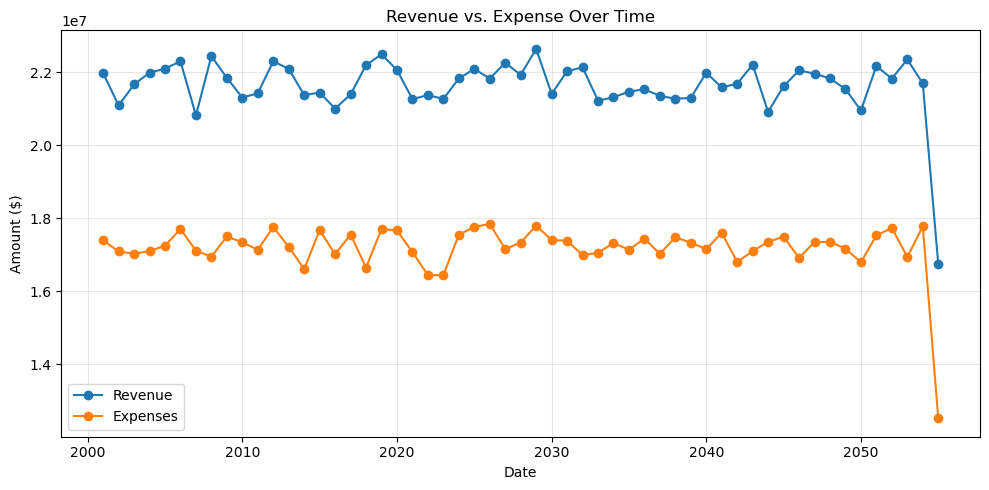

In [70]:
plt.figure(figsize = (10, 5))
plt.plot(yearly.index, yearly['Revenue'], marker = 'o', label = 'Revenue')
plt.plot(yearly.index, yearly['Expenses'], marker = 'o', label = 'Expenses')
plt.title('Revenue vs. Expense Over Time')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.grid(alpha = 0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
# Box plots for identify the spread and outliers in profit and cash flow
cols = df[['Profit', 'Cash Flow']]
cols = cols.dropna()

# Box plot for outlier detection
plt.figure(figsize = (10, 6))
cols.boxplot(vert = False)
plt.title("Profit and Cash Flow Distribution ")
plt.xticks(rotation = 45)
plt.show()

ValueError: Boolean array expected for the condition, not int64

<Figure size 1000x600 with 0 Axes>